**Circuits Data**

Enter Description of the data here --> To Edit

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

circuits = pd.read_csv('circuits.csv',encoding = "utf-8")
print('This is the circuits data')
circuits.head(10)

This is the circuits data


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.73470,7.42056,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco
6,7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada,45.50000,-73.52280,13,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...
7,8,magny_cours,Circuit de Nevers Magny-Cours,Magny Cours,France,46.86420,3.16361,228,http://en.wikipedia.org/wiki/Circuit_de_Nevers...
8,9,silverstone,Silverstone Circuit,Silverstone,UK,52.07860,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
9,10,hockenheimring,Hockenheimring,Hockenheim,Germany,49.32780,8.56583,103,http://en.wikipedia.org/wiki/Hockenheimring


In [3]:
from tabulate import tabulate

my_columns = ['country'] # inspection of different columns here

# extract unique values for the specified columns
unique_values = {col: circuits[col].unique().tolist() for col in my_columns}

# get the maximum number of unique values to determine the number of columns
max_cols = max(len(v) for v in unique_values.values())

# fill each list of unique values to have the same length
for col, values in unique_values.items():
    unique_values[col].extend([''] * (max_cols - len(values)))

# convert the dictionary to a dataframe
unique_df = pd.DataFrame(unique_values)

# create a table with columns as unique values and rows as original columns
table = tabulate(unique_df, headers='keys', tablefmt='grid')

print(table)

+----+---------------+
|    | country       |
+====+===============+
|  0 | Australia     |
+----+---------------+
|  1 | Malaysia      |
+----+---------------+
|  2 | Bahrain       |
+----+---------------+
|  3 | Spain         |
+----+---------------+
|  4 | Turkey        |
+----+---------------+
|  5 | Monaco        |
+----+---------------+
|  6 | Canada        |
+----+---------------+
|  7 | France        |
+----+---------------+
|  8 | UK            |
+----+---------------+
|  9 | Germany       |
+----+---------------+
| 10 | Hungary       |
+----+---------------+
| 11 | Belgium       |
+----+---------------+
| 12 | Italy         |
+----+---------------+
| 13 | Singapore     |
+----+---------------+
| 14 | Japan         |
+----+---------------+
| 15 | China         |
+----+---------------+
| 16 | Brazil        |
+----+---------------+
| 17 | USA           |
+----+---------------+
| 18 | United States |
+----+---------------+
| 19 | UAE           |
+----+---------------+
| 20 | Arge

In [5]:
circuits.describe()

,circuitId,lat,lng
count,77.000000,77.000000,77.000000
mean,39.883117,33.442925,1.076683
std,23.001701,22.808866,65.516951
min,1.000000,-37.849700,-118.189000
25%,20.000000,32.777400,-9.394170
50%,40.000000,40.951700,3.930830
75%,59.000000,46.958900,19.248600
max,80.000000,57.265300,144.968000


In [ ]:
# from the inspection above, USA and United States are listed as two different 
#unique values, they are the same country though so correcting for this.

circuits['country'].replace('USA', 'United States', inplace=True)

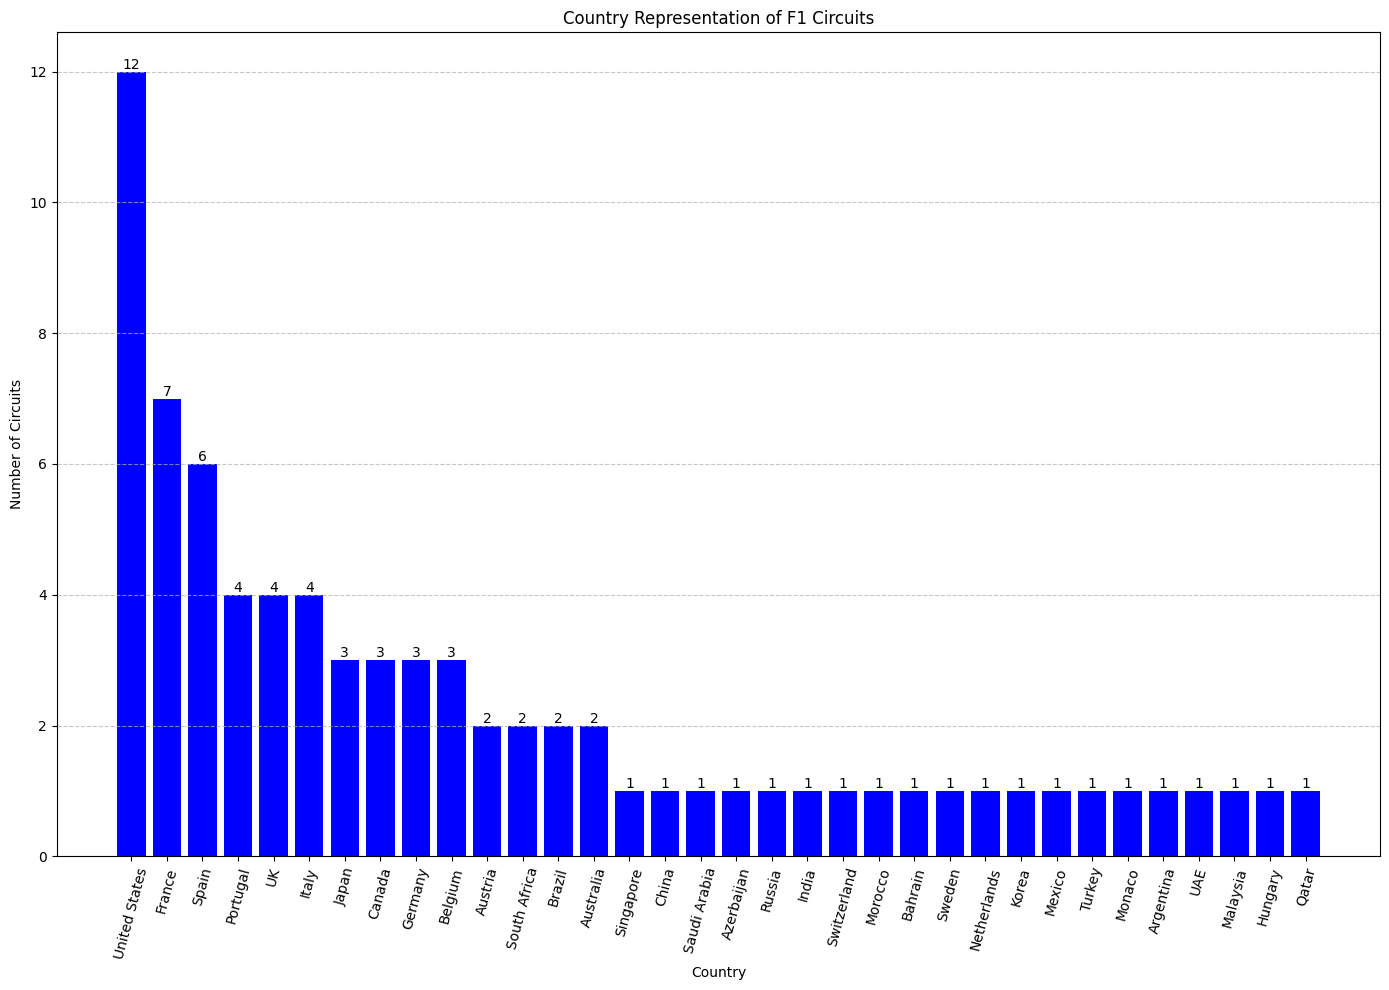

In [ ]:
# visualize the country distribution
country_counts = circuits['country'].value_counts()

# Create a bar chart
plt.figure(figsize=(14, 10))  # adjust the size of the bar chart

ax = plt.bar(country_counts.index, country_counts.values, color='blue')

# Add annotation to bars
for barz in ax:
    height = barz.get_height()
    plt.text(barz.get_x() + barz.get_width() / 2., height,
             '%d' % int(height), ha='center', va='bottom', color='black')

plt.xlabel('Country')
plt.ylabel('Number of Circuits')
plt.title('Country Representation of F1 Circuits')
plt.xticks(rotation=75)  # rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # gridlines for better readability

plt.tight_layout()  # fit labels within the figure boundaries
plt.show()


**Constructors**

In [7]:
constructors = pd.read_csv('constructors.csv',encoding = "utf-8")
print('This is the Constructors data')
constructors.head()

This is the Constructors data


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [8]:
# unique values and data points count
unique_counts = constructors.nunique()
data_points = constructors.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

                Unique Values  Total Data Points
constructorId             211                211
constructorRef            211                211
name                      211                211
nationality                24                211
url                       174                211


In [9]:
constructors.describe()

,constructorId
count,211.000000
mean,107.037915
std,61.653629
min,1.000000
25%,54.500000
50%,107.000000
75%,159.500000
max,214.000000


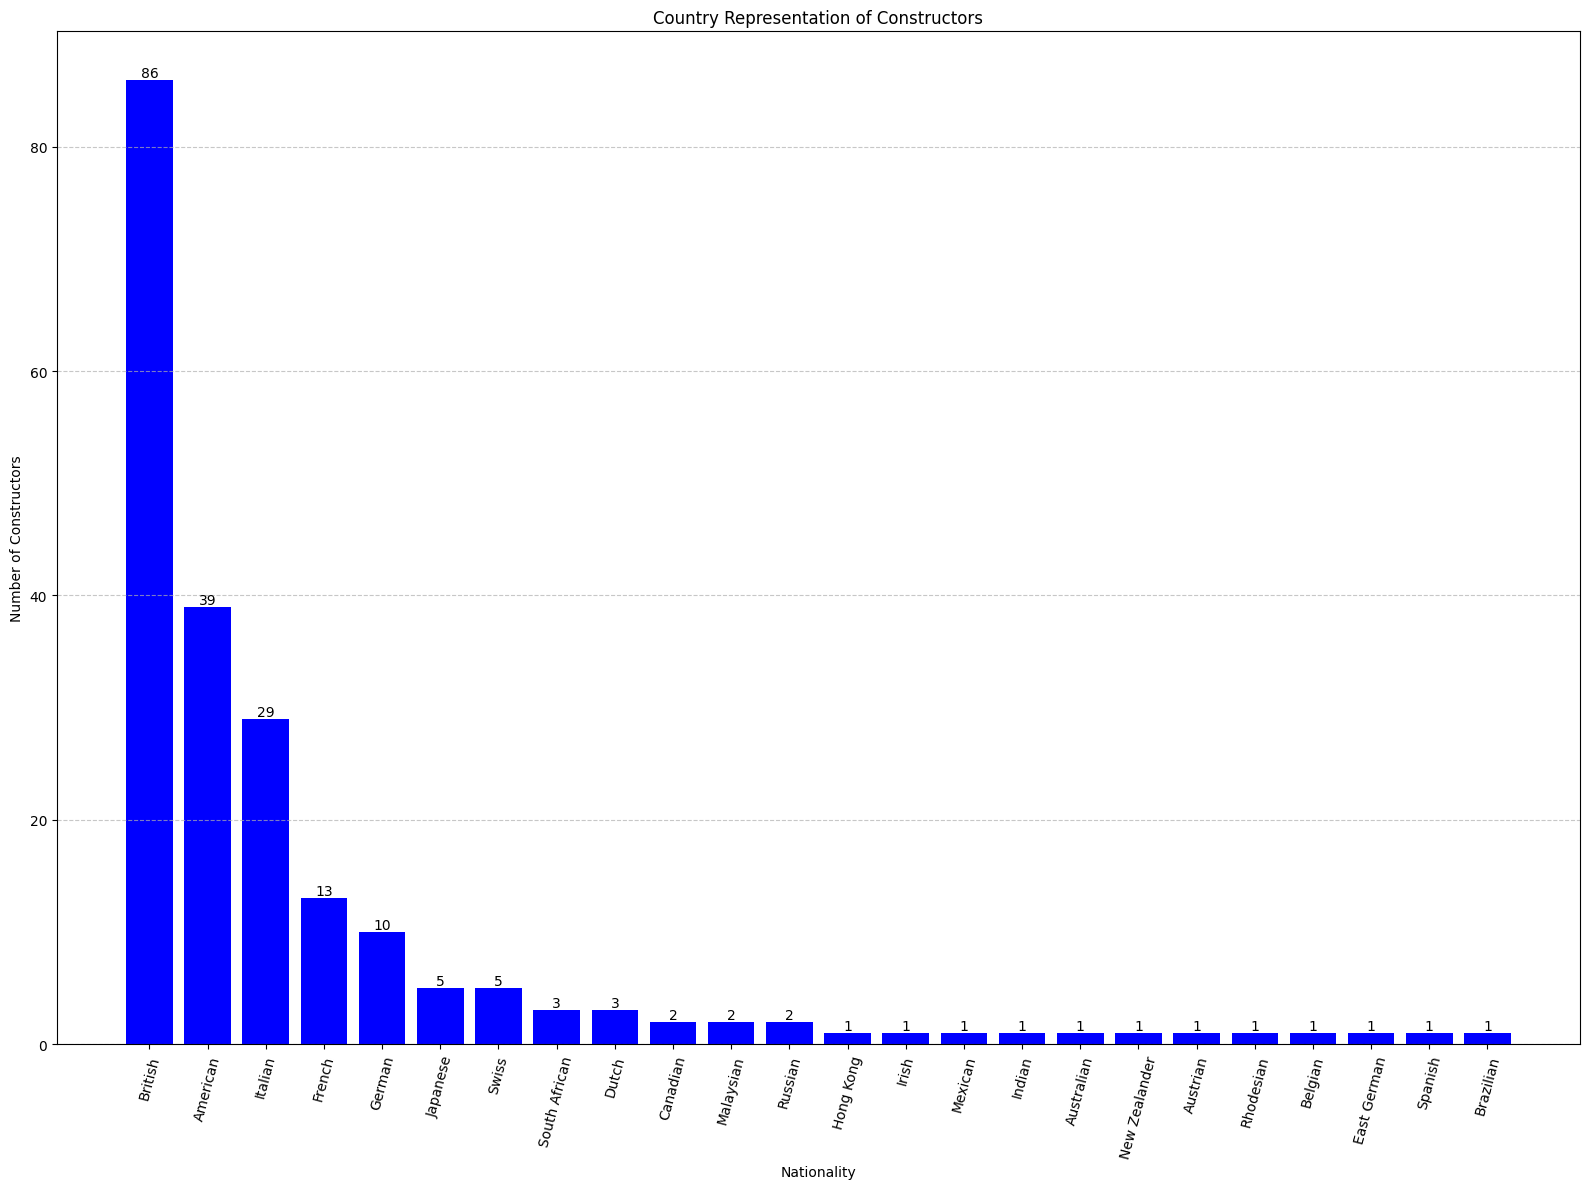

In [11]:
# visualize the nationality distribution
nationality_counts = constructors['nationality'].value_counts()

# Create a bar chart
plt.figure(figsize=(16, 12))  # adjust the size of the bar chart

ax = plt.bar(nationality_counts.index, nationality_counts.values, color = 'blue')

# Add annotation to bars
for barz in ax:
    height = barz.get_height()
    plt.text(barz.get_x() + barz.get_width() / 2., height,
             '%d' % int(height), ha='center', va='bottom', color='black')

plt.xlabel('Nationality')
plt.ylabel('Number of Constructors')
plt.title('Country Representation of Constructors')
plt.xticks(rotation=75)  # rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # gridlines for better readability

plt.tight_layout()  # fit labels within the figure boundaries
plt.show()

**Constructor Results**

Enter Description of the data here --> To Edit

In [ ]:
constructor_results = pd.read_csv('constructor_results.csv',encoding = "utf-8")
print('This is the constructor_Results data')
constructor_results.head()

This is the constructor_Results data


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [ ]:

# Count the number of unique values for each column
unique_counts = constructor_results.nunique()

# Count the total number of data points (non-missing values) for each column
data_points = constructor_results.count()

# Create a new dataframe to represent the results
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

                      Unique Values  Total Data Points
constructorResultsId          12340              12340
raceId                         1033              12340
constructorId                   175              12340
points                           58              12340
status                            2              12340


**Constructor Standings**

In [ ]:
constructor_standings = pd.read_csv('constructor_standings.csv', encoding = "utf-8")
print('This is the constructor_standings data')
constructor_standings.head()

This is the constructor_standings data


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [ ]:
# unique values and data points count
unique_counts = constructor_standings.nunique()
data_points = constructor_standings.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

                        Unique Values  Total Data Points
constructorStandingsId          13101              13101
raceId                           1032              13101
constructorId                     159              13101
points                            547              13101
position                           22              13101
positionText                       23              13101
wins                               20              13101


**Drivers**

In [ ]:
drivers = pd.read_csv('drivers.csv',encoding = "utf-8")
print('This is the Drivers data')
drivers.head()

This is the Drivers data


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [ ]:
# unique values and data points count
unique_counts = drivers.nunique()
data_points = drivers.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

             Unique Values  Total Data Points
driverId               858                858
driverRef              858                858
number                  47                858
code                    96                858
forename               477                858
surname                799                858
dob                    840                858
nationality             42                858
url                    858                858


**Driver Standings**

In [ ]:
driver_standings = pd.read_csv('driver_standings.csv',encoding = "utf-8")
print('This is the Driver Standings data')
driver_standings.head()

This is the Driver Standings data


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [ ]:
# unique values and data points count
unique_counts = driver_standings.nunique()
data_points = driver_standings.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

                   Unique Values  Total Data Points
driverStandingsId          34234              34234
raceId                      1096              34234
driverId                     851              34234
points                       423              34234
position                     108              34234
positionText                 109              34234
wins                          16              34234


**Lap Times**

In [ ]:
lap_times = pd.read_csv('lap_times.csv',encoding = "utf-8")
print('This is the Lap Times data')
lap_times.head()

This is the Lap Times data


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [ ]:
# unique values and data points count
unique_counts = lap_times.nunique()
data_points = lap_times.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

              Unique Values  Total Data Points
raceId                  515             557007
driverId                140             557007
lap                      87             557007
position                 24             557007
time                  75015             557007
milliseconds          75015             557007


**Pitstops Data**

In [ ]:
pitstops = pd.read_csv('pit_stops.csv',encoding = "utf-8")
print('This is the Pit Stops data')
lap_times.head()

This is the Pit Stops data


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [ ]:
# unique values and data points count
unique_counts = pitstops.nunique()
data_points = pitstops.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

              Unique Values  Total Data Points
raceId                  256              10337
driverId                 73              10337
stop                      7              10337
lap                      74              10337
time                   7648              10337
duration               7133              10337
milliseconds           7133              10337


In [ ]:
print(pitstops['duration'].dtype)
#pitstops['duration'] = pitstops['duration'].astype(float).astype(int)
def convert_to_seconds(duration_str):
    # Check if there's a colon in the string
    if ':' in duration_str:
        minutes, seconds = duration_str.split(':')
        total_seconds = float(minutes) * 60 + float(seconds)
    else:
        total_seconds = float(duration_str)
    
    return total_seconds

# Apply the function to the 'duration' column
pitstops['duration'] = pitstops['duration'].apply(convert_to_seconds)

# convert to integer
pitstops['duration'] = pitstops['duration'].astype(int)

print(pitstops['duration'].dtype)
pitstops.describe()

object
int64


,raceId,driverId,stop,lap,duration,milliseconds
count,10337.000000,10337.000000,10337.000000,10337.000000,10337.000000,1.033700e+04
mean,966.370804,529.700590,1.773242,25.426623,77.889039,7.838557e+04
std,83.383646,388.537823,0.937299,14.911499,292.641886,2.926438e+05
min,841.000000,1.000000,1.000000,1.000000,12.000000,1.289700e+04
25%,890.000000,18.000000,1.000000,13.000000,21.000000,2.191900e+04
50%,960.000000,816.000000,2.000000,25.000000,23.000000,2.360800e+04
75%,1039.000000,832.000000,2.000000,36.000000,26.000000,2.642700e+04
max,1115.000000,859.000000,7.000000,78.000000,3069.000000,3.069017e+06


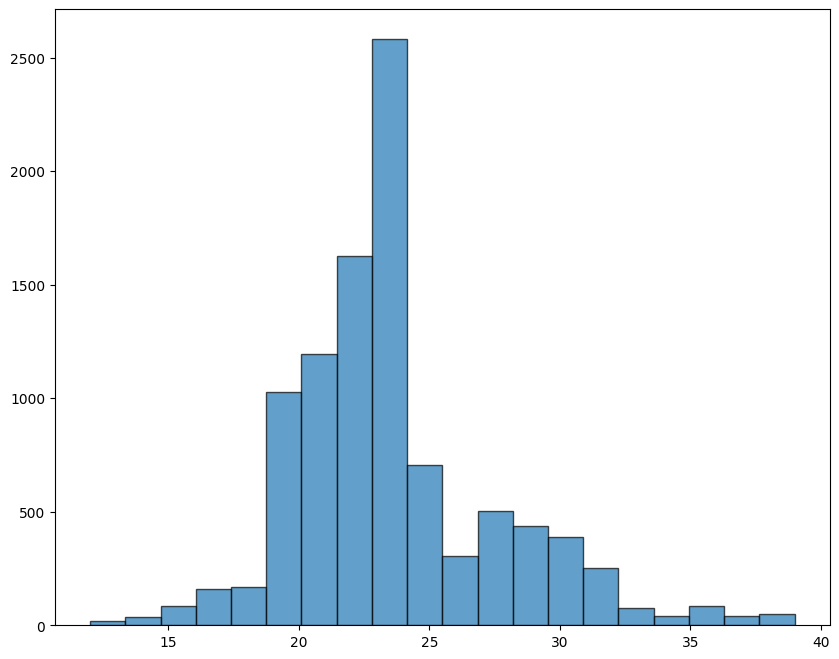

In [ ]:
threshold = 40
filtered_durations = pitstops[pitstops['duration'] < threshold]['duration']

plt.figure(figsize = (10, 8))
plt.hist(filtered_durations, bins = 20, edgecolor='black', alpha=0.7)
plt.show()


**Qualifying Data**

In [ ]:
quali = pd.read_csv('qualifying.csv',encoding = "utf-8")
print('This is the Qualifying data')
quali.head()

#type(quali['q1'])

This is the Qualifying data


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [ ]:
# unique values and data points count
unique_counts = quali.nunique()
data_points = quali.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

               Unique Values  Total Data Points
qualifyId               9915               9915
raceId                   465               9915
driverId                 169               9915
constructorId             46               9915
number                    54               9915
position                  28               9915
q1                      8694               9907
q2                      5091               9747
q3                      3221               9579


**Races** 

In [ ]:
races = pd.read_csv('races.csv',encoding = "utf-8")
print('This is the Races data')
races.head()

This is the Races data


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
# unique values and data points count
unique_counts = races.nunique()
data_points = races.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

             Unique Values  Total Data Points
raceId                1101               1101
year                    74               1101
round                   22               1101
circuitId               77               1101
name                    54               1101
date                  1101               1101
time                    34               1101
url                   1101               1101
fp1_date                67               1101
fp1_time                19               1101
fp2_date                67               1101
fp2_time                16               1101
fp3_date                55               1101
fp3_time                17               1101
quali_date              67               1101
quali_time              13               1101
sprint_date             13               1101
sprint_time              7               1101


**Results Data**

In [ ]:
results = pd.read_csv('results.csv',encoding = "utf-8")
print('This is the Results data')
results.head()

This is the Results data


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [ ]:
# unique values and data points count
unique_counts = results.nunique()
data_points = results.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

                 Unique Values  Total Data Points
resultId                 26180              26180
raceId                    1096              26180
driverId                   858              26180
constructorId              210              26180
number                     130              26180
grid                        35              26180
position                    34              26180
positionText                39              26180
positionOrder               39              26180
points                      39              26180
laps                       172              26180
time                      7067              26180
milliseconds              7283              26180
fastestLap                  80              26180
rank                        26              26180
fastestLapTime            7041              26180
fastestLapSpeed           7233              26180
statusId                   137              26180


**Seasons**

In [ ]:
seasons = pd.read_csv('seasons.csv',encoding = "utf-8")
print('This is the Seasons data')
seasons.head()

This is the Seasons data


,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


In [ ]:
# unique values and data points count
unique_counts = seasons.nunique()
data_points = seasons.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

max(seasons['year'])

      Unique Values  Total Data Points
year             74                 74
url              74                 74


2023

**Sprint Results**

In [ ]:
sprint = pd.read_csv('sprint_results.csv',encoding = "utf-8")
print('This is the Sprint Results data')
sprint.head()

This is the Sprint Results data


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


In [ ]:
# unique values and data points count
unique_counts = sprint.nunique()
data_points = sprint.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

                Unique Values  Total Data Points
resultId                  200                200
raceId                     10                200
driverId                   29                200
constructorId              10                200
number                     30                200
grid                       21                200
position                   21                200
positionText               23                200
positionOrder              20                200
points                      9                200
laps                       13                200
time                      186                200
milliseconds              186                200
fastestLap                 24                200
fastestLapTime            193                200
statusId                    6                200


**Status** --> not very useful, can't be combined with any other data set. 
--> Find alternative way to determine if they finished the race or not

In [ ]:
status = pd.read_csv('status.csv',encoding = "utf-8")
print('This is the Status data')
status.head()

This is the Status data


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [ ]:
# unique values and data points count
unique_counts = status.nunique()
data_points = status.count()
summary_table = pd.DataFrame({
    'Unique Values': unique_counts,
    'Total Data Points': data_points
})

print(summary_table)

          Unique Values  Total Data Points
statusId            139                139
status              139                139


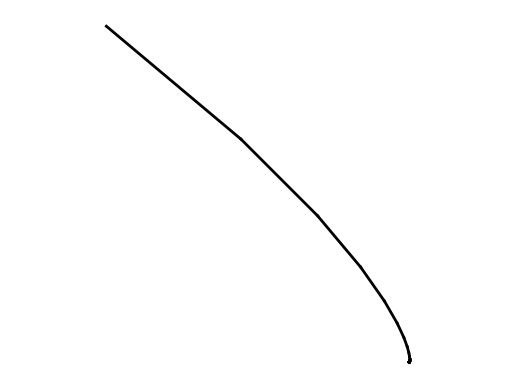

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def fibonacci_sequence_shape(n):
    fib_sequence = [0, 1000]
    while len(fib_sequence) < n:
        next_value = fib_sequence[-1] + fib_sequence[-2]
        fib_sequence.append(next_value)
    
    return fib_sequence

def plot_fibonacci_shape(n):
    fib_sequence = fibonacci_sequence_shape(n)
    fig, ax = plt.subplots()
    ax.set_aspect('equal', adjustable='datalim')
    ax.axis('off')
    
    x, y = 0, 0
    angle = 5  # Starting angle
    
    for value in fib_sequence:
        angle_rad = np.radians(angle)
        x_next = x + value * np.cos(angle_rad)
        y_next = y + value * np.sin(angle_rad)
        ax.plot([x, x_next], [y, y_next], 'k', linewidth=2)
        x, y = x_next, y_next
        angle += 5  # Rotate by 90 degrees for the next segment
    
    plt.show()

# Change 'n' to the desired number of segments in the Fibonacci sequence shape
n = 100
plot_fibonacci_shape(n)
